<a href="https://colab.research.google.com/github/koreahong/parking_lot_analysis/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석


## 1 .개념  

- 통계적  
  - 독립변수를 활용해 종속변수를 예측할 수 있는 초평면을 적합시키는 것
  - 통계적 회귀분석은 오차를 최소화하는 계수를 적합시키는 것에 초점임

- 머신러닝  
  - 머신런닝 기법은 RSS(오차제곱)을 활용해 계수를 기준으로 편미분하여 잔차를 최소하는 방법을 찾음.  

## 2. 과정

- 데이터전처리
  1. null값처리
  2. EDA
    - 히트맵, 산점도 등등
    - 이상치 처리(IQR)

- 모델링(통계적)
  - step-wise
    - 전진, 후진 선택법으로 변수선택
    - p값, VIF값을 고려  
  - 회귀 5가지 가정 확인

- 모델링(머신러닝)
  - 파라미터값 최적화

  




# 실습

data는 이커머스 구매내역으로 진행한다

In [15]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston

from patsy import dmatrix

import copy

In [89]:
## 최종 적합 코드
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
# or 데이터프레임.values

formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
    "scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.sqrt(LSTAT)) + C(CHAS)"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

# EDA

- 위 작업을 통해서 다음을 확인해야 함.  by heatmap, pairplot 등  

1. 다항 회귀 변환 여부 
2. 로그변환 여부
3. 이상치 확인

In [16]:
data_copy = copy.deepcopy(dfX0)


array([0., 1.])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


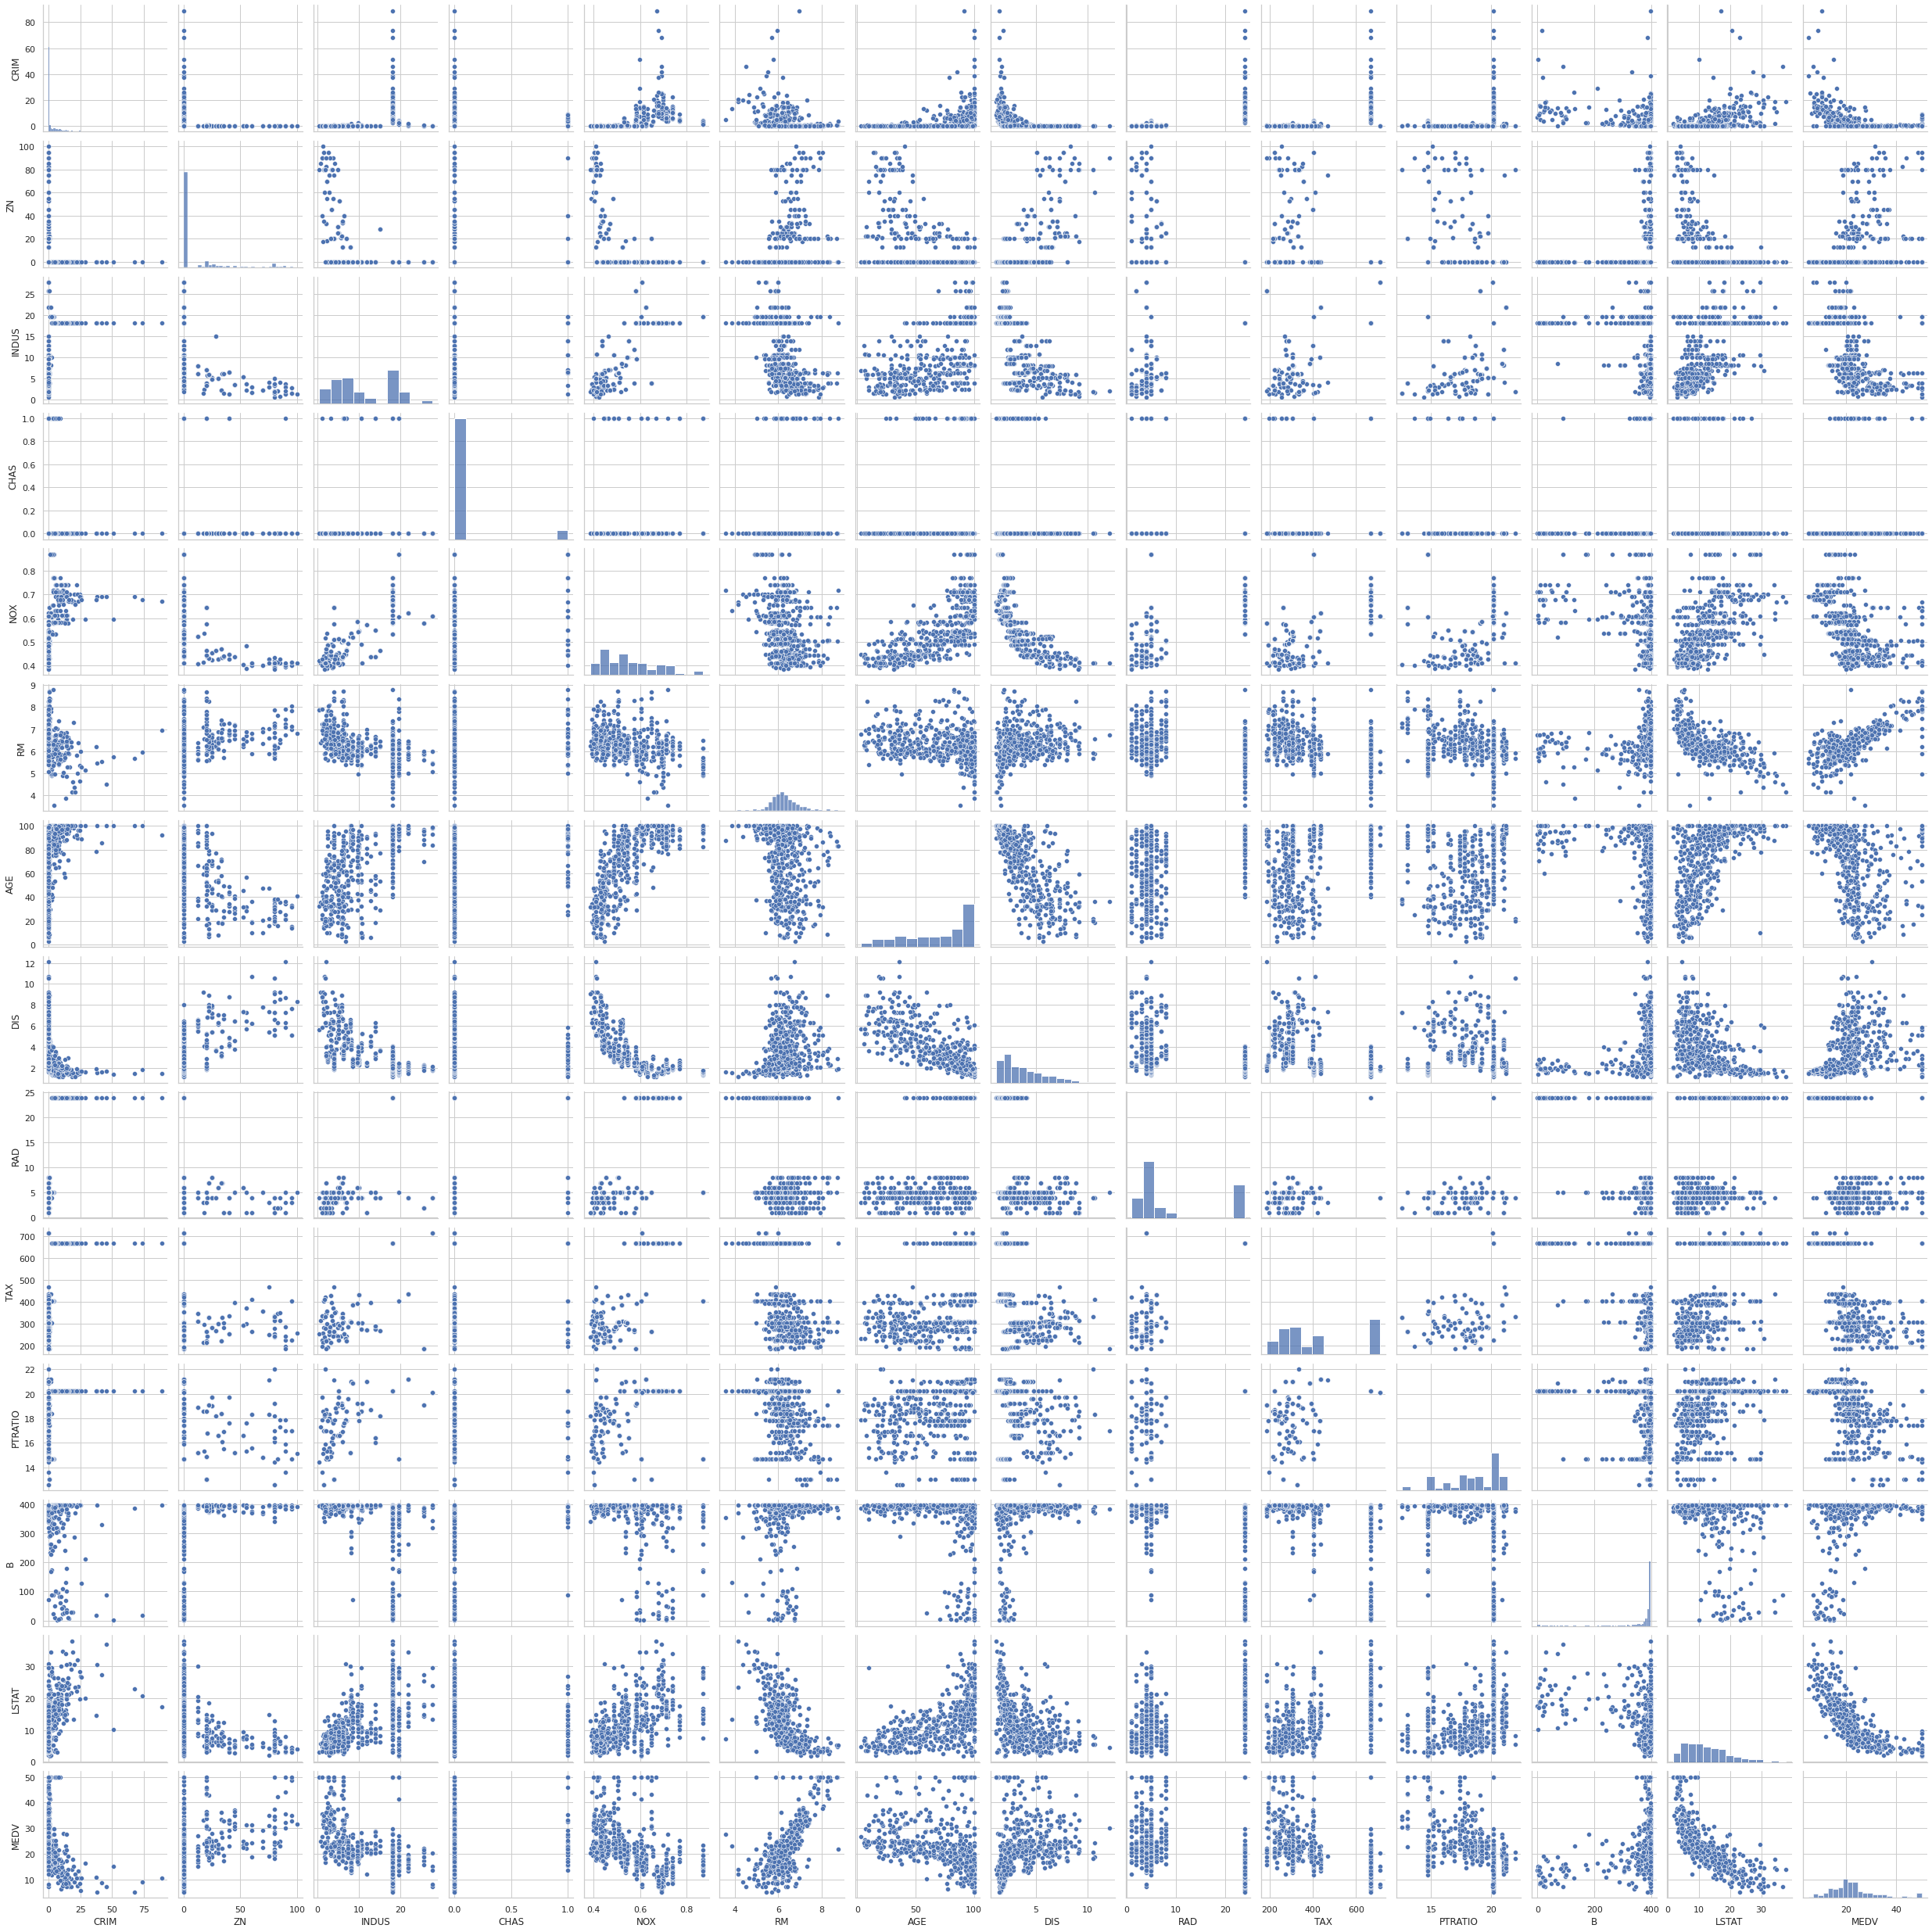

In [103]:
sns.pairplot(data_copy, size = 2.5, x_vars=data_copy, y_vars=data_copy)
plt.show()

## 다중회귀 및 로그변환 예시

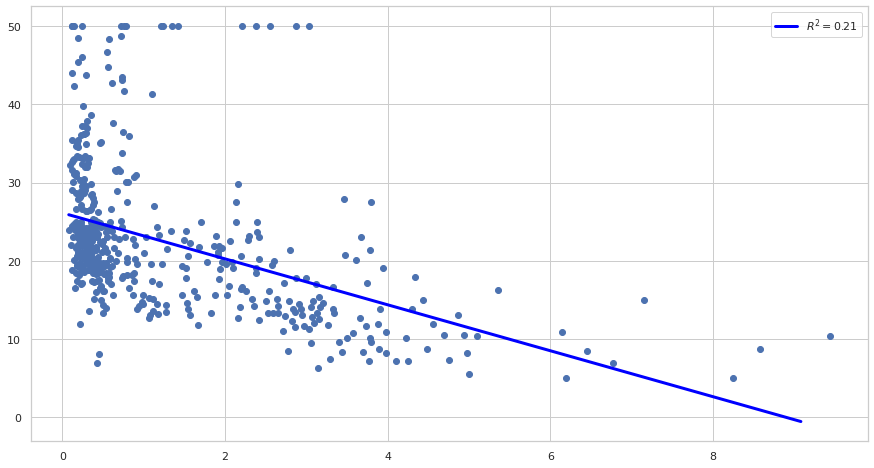

In [100]:
qua = PolynomialFeatures(degree=2)
X = data_copy[['CRIM']].values
y = data_copy['MEDV'].values

X_sqrt = np.sqrt(X)

X_fit = np.arange(X_sqrt.min(), X_sqrt.max(), 1).reshape(-1,1)

lr.fit(X_sqrt, y)
y_qua_fit = lr.predict(X_fit)
l_r2 = r2_score(y, lr.predict(X_sqrt))

plt.scatter(X_sqrt, y)
plt.plot(X_fit, y_qua_fit, c='blue', lw=3, label=f'$R^2={  round(l_r2, 2) }$')
plt.legend()
plt.show()

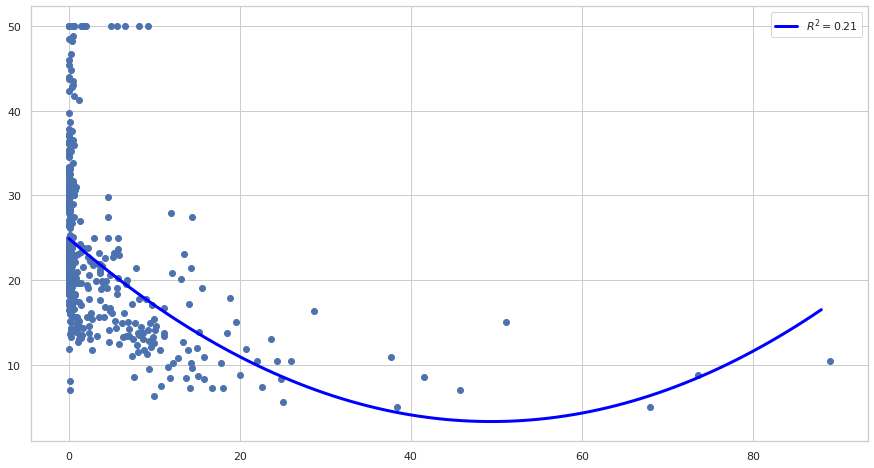

In [97]:
qua = PolynomialFeatures(degree=2)
X = data_copy[['CRIM']].values
y = data_copy['MEDV'].values

X_quad = qua.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1).reshape(-1,1)

lr.fit(X_quad, y)
y_qua_fit = lr.predict(qua.fit_transform(X_fit))
l_r2 = r2_score(y, lr.predict(X_quad))

plt.scatter(X, y)
plt.plot(X_fit, y_qua_fit, c='blue', lw=3, label=f'$R^2={  round(l_r2, 2) }$')
plt.legend()
plt.show()

------------------------------
LSTAT 예시

이 경우는 target을 로그변환, 설명변수를 제곱근변환을 한경우 더 잘 적함됨

In [60]:
X = data_copy[['LSTAT']].values
y = data_copy['MEDV'].values

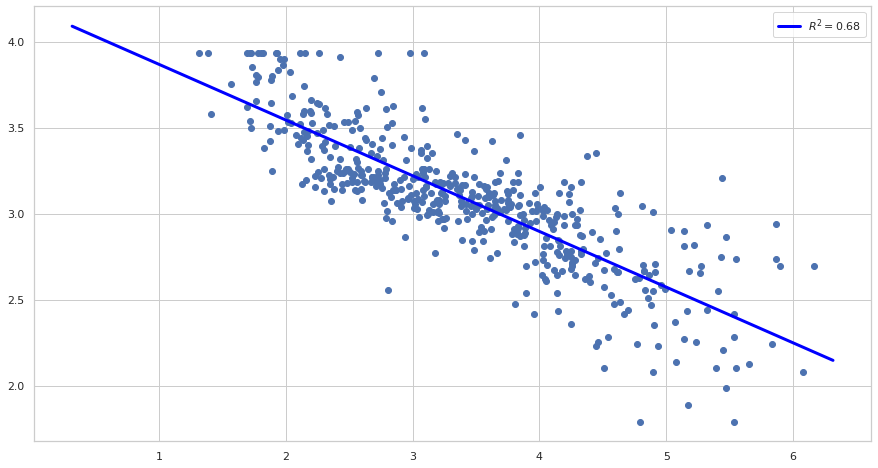

In [61]:
x_sqrt = np.sqrt(X)
y_log = np.log1p(y)

X_fit = np.arange(x_sqrt.min() - 1, x_sqrt.max() + 1, 1).reshape(-1,1)

lr = LinearRegression()

lr.fit(x_sqrt, y_log)
y_lin_fit = lr.predict(X_fit)

l_r2 = r2_score(y_log, lr.predict(x_sqrt))

plt.scatter(x_sqrt, y_log)
plt.plot(X_fit, y_lin_fit, c='blue', lw=3, label=f'$R^2={  round(l_r2, 2) }$')
plt.legend()
plt.show()

---------------------
RM 예시

이 경우는 아무런 변환 없이 그냥 진행하는 것이 더 잘 적합됨

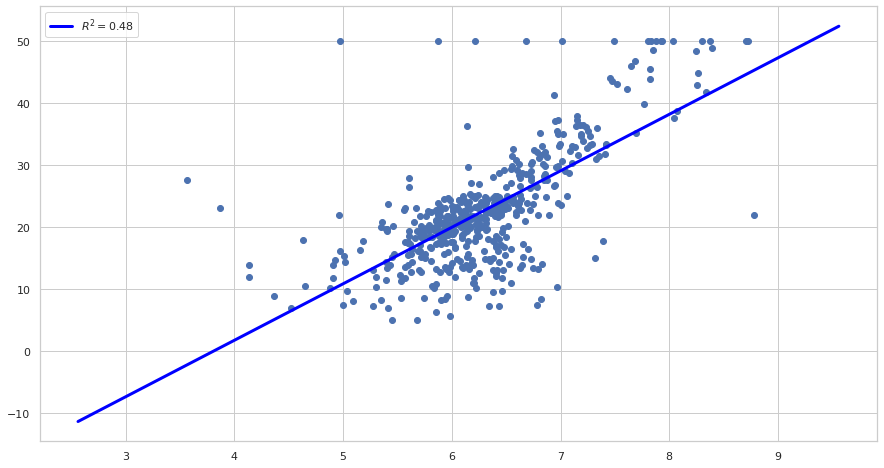

In [64]:
X = data_copy[['RM']].values

X_fit = np.arange(X.min() - 1, X.max() + 1, 1).reshape(-1,1)

lr = LinearRegression()

lr.fit(X, y)
y_lin_fit = lr.predict(X_fit)

l_r2 = r2_score(y, lr.predict(X))

plt.scatter(X, y)
plt.plot(X_fit, y_lin_fit, c='blue', lw=3, label=f'$R^2={  round(l_r2, 2) }$')
plt.legend()
plt.show()

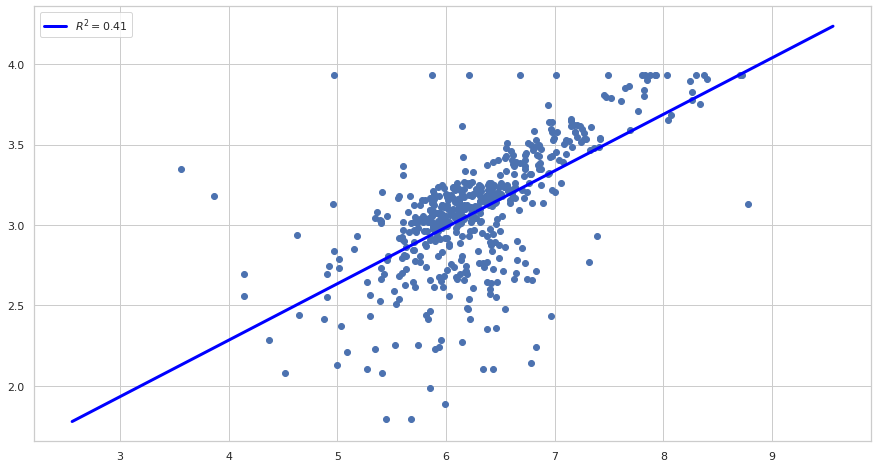

In [65]:
X = data_copy[['RM']].values
# x_sqrt = np.sqrt(X)
y_log = np.log1p(y)

X_fit = np.arange(X.min() - 1, X.max() + 1, 1).reshape(-1,1)

lr = LinearRegression()

lr.fit(X, y_log)
y_lin_fit = lr.predict(X_fit)

l_r2 = r2_score(y_log, lr.predict(X))

plt.scatter(X, y_log)
plt.plot(X_fit, y_lin_fit, c='blue', lw=3, label=f'$R^2={  round(l_r2, 2) }$')
plt.legend()
plt.show()